<a href="https://colab.research.google.com/github/Nash2027/Driver-distraction/blob/main/ModeleV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ==============================
# 1. Monter Google Drive
# ==============================
from google.colab import drive
drive.mount('/content/drive')

# ==============================
# 2. Charger le dataset
# ==============================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Chemin vers ton dataset dans Google Drive
dataset_dir = "/content/drive/MyDrive/dataset"

img_size = (128, 128)  # tu peux changer 128x128 -> 224x224 si tu veux
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    dataset_dir + "/train",
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_dir + "/val",
    image_size=img_size,
    batch_size=batch_size
)

# Normalisation [0,255] -> [0,1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# ==============================
# 3. Créer un modèle CNN simple
# ==============================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes : attentif / distrait
])

# ==============================
# 4. Compiler le modèle
# ==============================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ==============================
# 5. Entraîner le modèle
# ==============================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# ==============================
# 6. Sauvegarder le modèle
# ==============================
model.save("/content/drive/MyDrive/driver_attention_model.h5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 450 files belonging to 2 classes.
Found 240 files belonging to 2 classes.
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4946 - loss: 0.8453 - val_accuracy: 0.6250 - val_loss: 0.6429
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6743 - loss: 0.6059 - val_accuracy: 0.6833 - val_loss: 0.5264
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8047 - loss: 0.3972 - val_accuracy: 0.7875 - val_loss: 0.4436
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8914 - loss: 0.2523 - val_accuracy: 0.9375 - val_loss: 0.2033
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9795 - loss: 0.1061 - val_accuracy: 0.9292 - val_loss: 0.1592
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9889 - loss: 0.0522 - val_accuracy: 0.9625 - val_loss: 0.1049
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Le modèle pense que la personne est : attentif


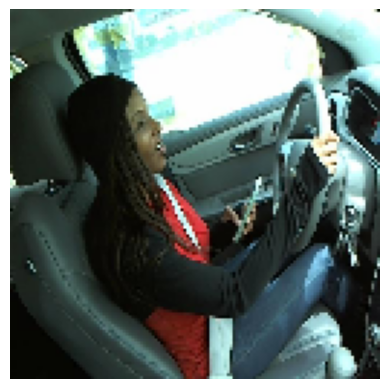

In [12]:
# ==============================
# Tester le modèle avec une image de ton PC
# ==============================
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload de l'image depuis ton PC
uploaded = files.upload()  # Clique sur "Choose File" et sélectionne ton image

# Récupérer le nom du fichier uploadé
for fname in uploaded.keys():
    test_image_path = fname

# Charger et redimensionner l'image
img = image.load_img(test_image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalisation

# Prédiction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]  # 0 ou 1

# --- Récupérer class_names avant la normalisation ---
# Si tu n'as pas sauvegardé class_names, tu peux le faire ici :
import os
dataset_dir = "/content/drive/MyDrive/dataset"  # adapte si nécessaire
class_names = sorted(os.listdir(dataset_dir + "/train"))

print(f"Le modèle pense que la personne est : {class_names[predicted_class]}")

# Afficher l'image
plt.imshow(img)
plt.axis('off')
plt.show()
